# M&S Gross Profit Analysis (FY2024 → FY2025)

This notebook computes Gross Profit, Gross Profit Margin (%), YoY changes and creates a professional chart with a secondary axis.

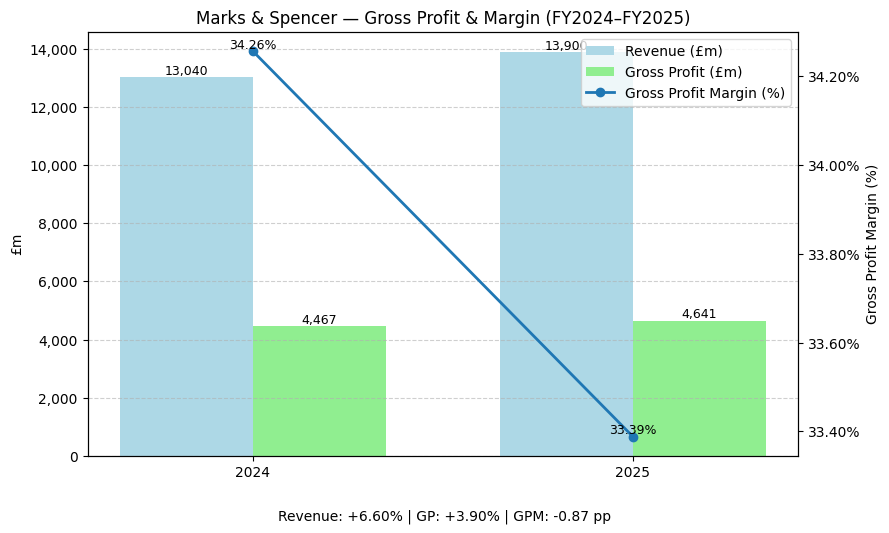

In [14]:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter, StrMethodFormatter

df = pd.read_csv("../data/ms_financials_2024_2025.csv")
df["Gross Profit"] = df["Revenue"] - df["COGS"]
df["GPM (%)"] = (df["Gross Profit"] / df["Revenue"]) * 100

rev_change = ((df.loc[1, "Revenue"] - df.loc[0, "Revenue"]) / df.loc[0, "Revenue"]) * 100
gp_change = ((df.loc[1, "Gross Profit"] - df.loc[0, "Gross Profit"]) / df.loc[0, "Gross Profit"]) * 100
gpm_change = df.loc[1, "GPM (%)"] - df.loc[0, "GPM (%)"]

fig, ax1 = plt.subplots(figsize=(9,5))

bar_width = 0.35
x = range(len(df))
ax1.bar([i - bar_width/2 for i in x], df["Revenue"], width=bar_width, label="Revenue (£m)", color="lightblue")
ax1.bar([i + bar_width/2 for i in x], df["Gross Profit"], width=bar_width, label="Gross Profit (£m)", color="lightgreen")
ax1.set_ylabel("£m")
ax1.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax1.set_xticks(list(x))
ax1.set_xticklabels(df["Year"])

ax2 = ax1.twinx()
ax2.plot(list(x), df["GPM (%)"], marker="o", linewidth=2, label="Gross Profit Margin (%)")
ax2.set_ylabel("Gross Profit Margin (%)")
ax2.yaxis.set_major_formatter(PercentFormatter(xmax=100))

plt.title("Marks & Spencer — Gross Profit & Margin (FY2024–FY2025)")

for i, v in enumerate(df["Revenue"]):
    ax1.text(i - bar_width/2, v, f"{v:,.0f}", ha="center", va="bottom", fontsize=9)
for i, v in enumerate(df["Gross Profit"]):
    ax1.text(i + bar_width/2, v, f"{v:,.0f}", ha="center", va="bottom", fontsize=9)
for i, v in enumerate(df["GPM (%)"]):
    ax2.text(i, v, f"{v:.2f}%", ha="center", va="bottom", fontsize=9)

# Legend 
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")

summary_text = f"Revenue: {rev_change:+.2f}% | GP: {gp_change:+.2f}% | GPM: {gpm_change:+.2f} pp"
fig.text(0.5, -0.05, summary_text, ha='center', fontsize=10)

ax1.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
